# Using PreTrained Model

Here,we are importing all the libraries one by one

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.initializers import glorot_uniform
from pathlib import Path


Here ,we are establishing connection to the drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive") 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


A command to unzip the file  just copy the path and after !unzip 'Paste it here' -d 'Path of the directory you want it to go to'

In [ ]:
!unzip '/content/drive/MyDrive/Classification/Horses_Human/train.zip'

Archive:  /content/drive/MyDrive/Classification/Horses_Human/train.zip
replace train/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
train_path='/content/drive/MyDrive/Classification/Horses_Human/Untitled Folder/train'

In [ ]:
train_batches=ImageDataGenerator(rescale=1.0/255).flow_from_directory(directory=train_path,target_size=(180,180))
valid_batches=ImageDataGenerator(rescale=1.0/255,validation_split=0.1).flow_from_directory(directory=train_path,subset='validation',target_size=(180,180))

Found 1027 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


ImageDataGenerator is a function that consists of various parameters it helps in the preprocessing of the images .

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),classes=5,
                   weights='imagenet')

for layer in pretrained_model.layers[:155]:
  layer.trainable=False

count = 0
for layer in pretrained_model.layers:
  print( count, layer.name, layer.trainable)
  count = count + 1
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(2, activation='softmax'))

In [ ]:
pretrained_model.summary()

This is the Model that we created that helps understanding the data and making predictions.

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 6, 6, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 512)               37749248  
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 61,337,986
Trainable params: 46,681,602
Non-trainable params: 14,656,384
_________________________________________________________________


In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=resnet_model.fit(train_batches,validation_data=valid_batches,batch_size=20,epochs=20,verbose=1)

Epoch 1/10
33/33 [==============================] - 351s 10s/step - loss: 54.3632 - accuracy: 0.5307 - val_loss: 8541.8438 - val_accuracy: 0.4902
Epoch 2/10
33/33 [==============================] - 180s 5s/step - loss: 0.7324 - accuracy: 0.5579 - val_loss: 148.6782 - val_accuracy: 0.4902
Epoch 3/10
33/33 [==============================] - 181s 5s/step - loss: 0.6327 - accuracy: 0.6719 - val_loss: 54.7669 - val_accuracy: 0.4902
Epoch 4/10
33/33 [==============================] - 181s 5s/step - loss: 0.5991 - accuracy: 0.6981 - val_loss: 61.0078 - val_accuracy: 0.4902
Epoch 5/10
33/33 [==============================] - 181s 5s/step - loss: 0.4054 - accuracy: 0.8043 - val_loss: 28.5464 - val_accuracy: 0.4902
Epoch 6/10
33/33 [==============================] - 182s 6s/step - loss: 0.3124 - accuracy: 0.8685 - val_loss: 28.7636 - val_accuracy: 0.4902
Epoch 7/10
33/33 [==============================] - 180s 5s/step - loss: 0.3099 - accuracy: 0.8637 - val_loss: 9.2435 - val_accuracy: 0.4902
Ep

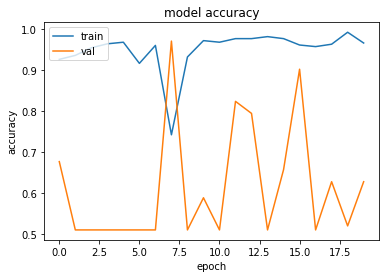

In [ ]:

from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

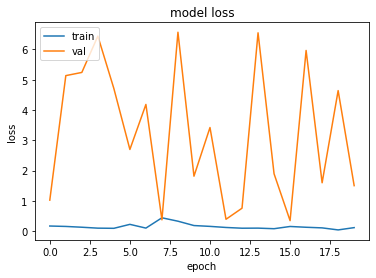

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
class_names = ['horses','humans']

In [ ]:
import numpy as np

The Image Is A horses With A Probability Of 73.11%.


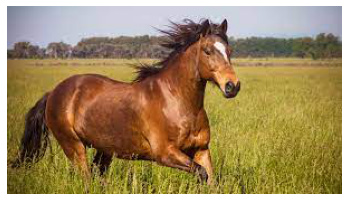

In [ ]:
from tensorflow.keras.preprocessing import image

path="/content/horse1.jpg"
img=image.load_img(path)
plt.imshow(img)
plt.axis("off")
img=img.resize((180,180))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.array(x)
predictions = resnet_model.predict(images)
score = tf.nn.softmax(predictions)
print(f"The Image Is A {class_names[np.argmax(score)]} With A Probability Of {100*np.max(score):.2f}%.")

# Creating ResNet50

In [ ]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

In [ ]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [ ]:
base_model = ResNet50(input_shape=(224, 224, 3))

In [ ]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense( 2,activation='softmax', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [ ]:
model = Model(inputs=base_model.input, outputs=headModel)

In [ ]:
train_batches=ImageDataGenerator(rescale=1.0/255).flow_from_directory(directory=train_path,target_size=(224,224))
valid_batches=ImageDataGenerator(rescale=1.0/255,validation_split=0.1).flow_from_directory(directory=train_path,subset='validation',target_size=(224,224))

Found 1027 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_batches,validation_data=valid_batches,batch_size=20,epochs=20,verbose=1)

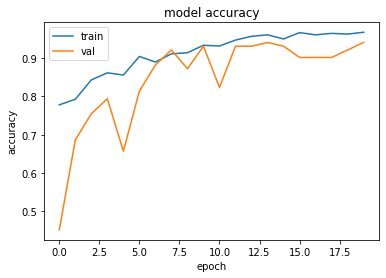

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

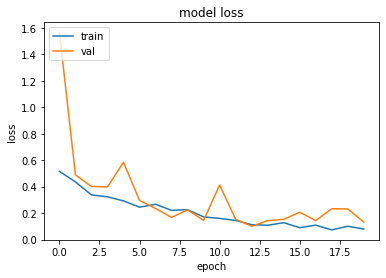

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The Image Is A humans With A Probability Of 73.11%.


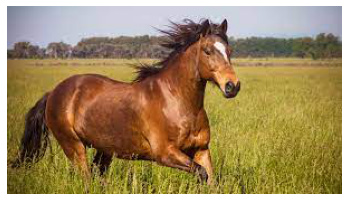

In [ ]:
classes = ['horses','humans']

from tensorflow.keras.preprocessing import image

path="/content/horse1.jpg"
img=image.load_img(path)
plt.imshow(img)
plt.axis("off")
img=img.resize((224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.array(x)
predictions = model.predict(images)
score = tf.nn.softmax(predictions)
print(f"The Image Is A {class_names[np.argmax(score)]} With A Probability Of {100*np.max(score):.2f}%.")